# TP2 - RBD 


 
##  Introducción 

El presente es el TP2 del curso [Diseño de Sistemas Críticos](https://sites.google.com/site/disenodesistemascriticos/home), agosto de 2017, [FI-UBA](http://www.fi.uba.ar).




## Introducción

Se planteará la forma de calcular la fiabilidad del sistema "Probador de relés", según el [enunciado recibido](https://drive.google.com/open?id=0Bz_Vhed1HU1DbkJaWHc0ak9STW8). En base a eso, se trabajó con las siguientes supuestos:

* los bloques *generador* tienen salidas open-drain  conectadas al mismo nodo, de manera de que cualquiera de ellos activa el relé(DUT)
* cada bloque *fuente* mantiene cargada la batería



## Diagrama en bloques

El siguente es el diagrama en "bloques de confiabilidad" *RBD* según la norma **IEC 61078**, del sistema completo.


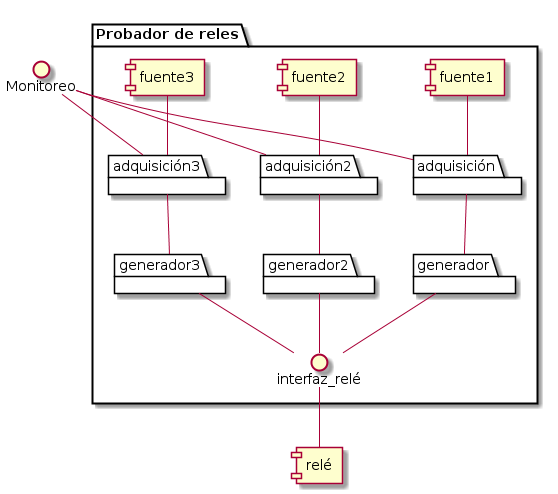

In [2]:
from IPython.display import Image
Image("./tp2-diag1b.png")

Debe obtenerse la fiabilidad R(t) de los siguientes bloques:

* fuente
* adquisición ( == adquisición2 == adquisición3 )
* generador ( == generador2  == generador3 )
* sincronizador
* interfaz_relé

### Subsistemas "generador" y "adquisición"

Éstos subsistemas tienen los siguientes topologías de fiabilidad:

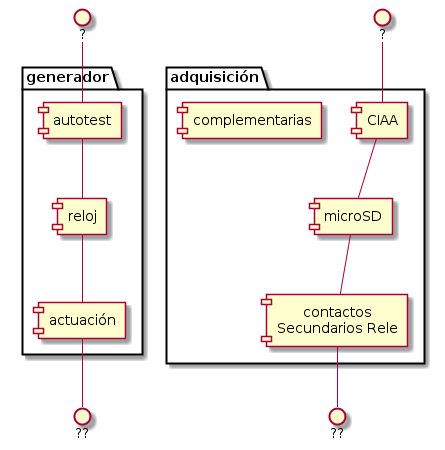

In [3]:
Image("./tp2-diag2.png")

La fiabilidad del bloque "generador" será:

$$R_{gen}(t) = R_{autotest}(t) * R_{reloj}(t) * R_{actuación}$$


La fiabilidad del bloque "adquisición" será:

$$R_{ad}(t) = R_{ciaa}(t) * R_{microsd}(t) * R_{contactos}$$


Tanto "generador" como "asquición" tienen redundancia, en una red 1-o-o-N (1 de N). Podemos modelar a toda la red como compuesta por 3 bloques virtuales $genad$ en paralelo que tendrá la siguente tasa de fallas: 

$$R_{genad'}(t) =  3R_{gen} * R_{ad} - 3(R_{gen} * R_{ad})^2 + (R_{gen}*R_{ad})^3  
$$



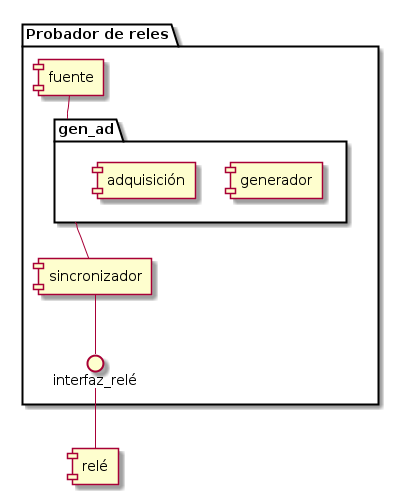

In [4]:
Image("./tp2-diag3.png")

Y la fiabilidad final del Sistema será: 

$$R_{sistema}(t) = R_{fuente}(t) * R_{genad'}(t) * R_{sincronizador} * R_{interfazRelé}$$

## Alternativa

En base base a lo anterior se propone  una alternativa con las siguientes características:

* se evita que la fiabilidad $R_{ciaa}$ defina la fiabildiad de $R_{genad}$ (subsitema *Adquisición-Generador*)
* se evita un sobre-costo dado que solo dos componentes *CIAA* pueden antender N bloques *adquisición* (sólo limitado por la cantidad de GPIO de *CIAA*)
* se evita un sobre-costo lineal al agegar mas bloques $R_{genad}$

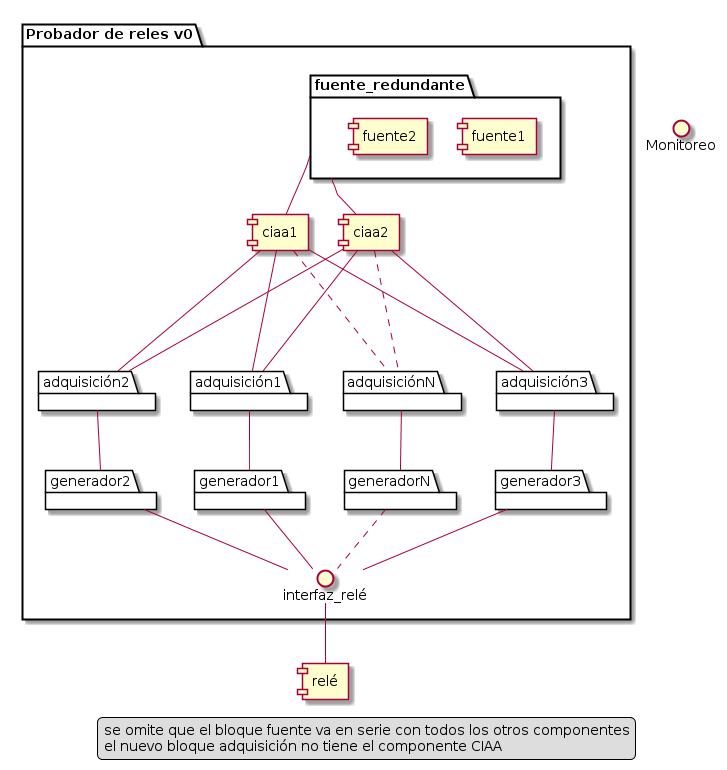

In [5]:
Image("./tp2-diagP1.png")

Se sugiere para la etapa de **diseño de detalle**:

* minimizar las señales en la interfaz *CIAA-Adquisición*. Atendiendo solo a *ck_reset* y/o *act_reset*, para facilitar la programación del bloques *$CIAA_x$*
* implementar la conección de los bloques *CIAA* con los *Adquisición* con un *bus*, se puede aprovechar la memoria de los conversores ADC128D818 
* implementar dicho *bus* de manera robusta para evitar convertirlo en un "single point of failure"
* Implementar el acceso directo del bloque "Monitoreo" a las placas microSD, de manera de descargar los datos en form